In [48]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [49]:
# ds_train = pd.read_csv('train.csv')
ds_test = pd.read_csv('test.csv')

In [68]:
# data = ds_train.values
data = ds_test.values
print data.shape
means = np.mean(data[:, :], axis=0)
cm = np.cov(data[:, :], rowvar=0)

data_std = (data - means)/(data.std(axis=0)+1e-03)
print data_std[1:5]

mean_std = np.mean(data, axis=0)
cm_std = np.cov(data_std, rowvar=0)

(28000L, 784L)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [69]:
print mean_std[:10]
print cm_std[120:125, 120:125]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.99996664  0.80112268  0.56703557  0.40000529  0.28095423]
 [ 0.80112268  0.99998481  0.83354413  0.59697117  0.41309186]
 [ 0.56703557  0.83354413  0.99999548  0.83747834  0.59783897]
 [ 0.40000529  0.59697117  0.83747834  1.00000228  0.83537695]
 [ 0.28095423  0.41309186  0.59783897  0.83537695  1.00000676]]


In [70]:
# Computing the scatter matrix for the dataset
X = data[:, :]
# Y = data[:, 0]
sm = np.empty_like(cm)
# dt = (X[0, :].reshape(means.shape[0], 1) - means.reshape(means.shape[0], 1)).dot((X[0, :].reshape(means.shape[0], 1) - means.reshape(means.shape[0], 1)).T)
for ix in range(data.shape[0]):
    sm += (X[ix, :].reshape(means.shape[0], 1) - means.reshape(means.shape[0], 1)).dot((X[ix, :].reshape(means.shape[0], 1) - means.reshape(means.shape[0], 1)).T)

In [71]:
eig_val_sc, eig_vec_sc = np.linalg.eig(sm)
eig_val_cm, eig_vec_cm = np.linalg.eig(cm)

In [72]:
scaling_f = eig_val_sc/eig_val_cm

(784L, 784L)
(784L,)


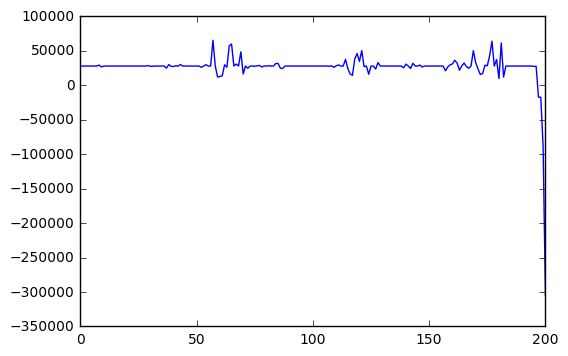

In [73]:
print eig_vec_sc.shape
print scaling_f.shape
# plt.plot(eig_val_cm, 'r')
# plt.plot(eig_val_sc)
plt.plot(scaling_f[500:])
plt.show()

In [74]:
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]
eig_pairs.sort(key=lambda x:x[0])
eig_pairs.reverse()

1.97751576941e-10


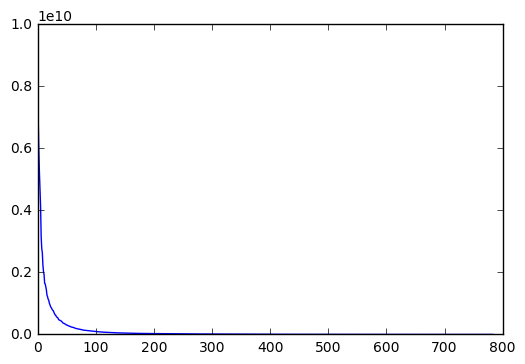

In [75]:
vals = np.zeros(len(eig_pairs))
for ix in range(len(eig_pairs)):
    vals[ix] = eig_pairs[ix][0]
print vals[700]
plt.plot(vals)
plt.show()

In [76]:
# select k dimensions out of all dimensions for feature space
k = 442
d = eig_pairs[0][1].shape[0] #
selected = [] 

for ix in range(k):
    selected.append(eig_pairs[ix][1].reshape(d, 1))

# Now stack the selected eigenvectors in W matrix
mat_W = np.hstack(selected)
print "moving to save the new dataset"

moving to save the new dataset


In [77]:
print mat_W.shape
print X.T.shape
y = (mat_W.T).dot(X.T)
print y.T.shape

(784L, 442L)
(784L, 28000L)
(28000L, 442L)


In [78]:
# saving the new dataset in train_200.csv file
dt_250 = y.T
print dt_250.shape
# np.savetxt('train_250.csv', dt_250, delimiter=',')
np.savetxt('test_250.csv', dt_250, delimiter=',')

(28000L, 442L)


In [79]:
import sklearn
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=784)

X = pca.fit_transform(data_std)
print X.shape

(28000L, 784L)


In [84]:
trans_cm = np.cov(X, rowvar=0)

In [86]:
v = pca.explained_variance_ratio_
cs = np.cumsum(v)/np.sum(v)

0.0991070072632


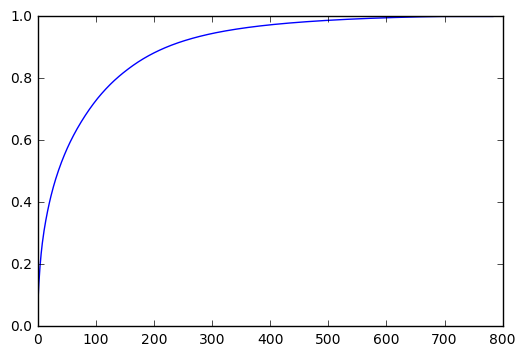

In [87]:
print cs[1]
plt.plot(cs)
plt.show()